# **Análise Qualidade do Sono e Estilo de Vida**

### Ambiente

In [1]:
#Importando Bibliotecas
import pandas as pd
import numpy as np

#Graficos
import matplotlib.pyplot as plt
import seaborn as sns

#Preparação Dados
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

#Modelagem
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from kneed import KneeLocator
import numpy as np
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA


### Obtenção de Dados

In [2]:
#Carregando dados csv em um data frame
df = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")

#Validar se o dataframe carregou
print(df.head())

   Person ID Gender  Age            Occupation  Sleep Duration  \
0          1   Male   27     Software Engineer             6.1   
1          2   Male   28                Doctor             6.2   
2          3   Male   28                Doctor             6.2   
3          4   Male   28  Sales Representative             5.9   
4          5   Male   28  Sales Representative             5.9   

   Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                 6                       42             6   Overweight   
1                 6                       60             8       Normal   
2                 6                       60             8       Normal   
3                 4                       30             8        Obese   
4                 4                       30             8        Obese   

  Blood Pressure  Heart Rate  Daily Steps Sleep Disorder  
0         126/83          77         4200            NaN  
1         125/80          75      

In [3]:
#Renomeando as colunas

df.columns = ["id", "genero", "idade", "ocupacao", "duracao_sono", "qualidade_sono", "nivel_atividade_fisica", "nivel_estresse", "imc", "pressao_sanguinea", "frequencia_cardiaca","passos_diarios", "disturbio_sono"]

### Análise da Estrutura de dados

In [4]:
#Avaliando as colunas do dataset
df.columns

Index(['id', 'genero', 'idade', 'ocupacao', 'duracao_sono', 'qualidade_sono',
       'nivel_atividade_fisica', 'nivel_estresse', 'imc', 'pressao_sanguinea',
       'frequencia_cardiaca', 'passos_diarios', 'disturbio_sono'],
      dtype='object')

In [5]:
#Consultando detalhes do dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      374 non-null    int64  
 1   genero                  374 non-null    object 
 2   idade                   374 non-null    int64  
 3   ocupacao                374 non-null    object 
 4   duracao_sono            374 non-null    float64
 5   qualidade_sono          374 non-null    int64  
 6   nivel_atividade_fisica  374 non-null    int64  
 7   nivel_estresse          374 non-null    int64  
 8   imc                     374 non-null    object 
 9   pressao_sanguinea       374 non-null    object 
 10  frequencia_cardiaca     374 non-null    int64  
 11  passos_diarios          374 non-null    int64  
 12  disturbio_sono          155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


#### Analise Volumetria

In [6]:
#Tamanho do dataset
df.shape

print('O dataset possui',df.shape[0], 'registros e', df.shape[1], 'atributos.')

O dataset possui 374 registros e 13 atributos.


In [9]:
#Registos com distúrbios do sono
df_disturbios = df.dropna()

print("Número de registros com distúrbios do sono: ", df_disturbios.shape[0])

Número de registros com distúrbios do sono:  155


In [10]:
#Distribuição dos distúrbios do sono
print("\n Distribuição dos distúrbios do sono: ")
print(df_disturbios['disturbio_sono'].value_counts())


 Distribuição dos distúrbios do sono: 
disturbio_sono
Sleep Apnea    78
Insomnia       77
Name: count, dtype: int64


In [11]:
#VERIFICA A EXISTÊNCIA DE DADOS NULOS
df.isna().sum()

id                          0
genero                      0
idade                       0
ocupacao                    0
duracao_sono                0
qualidade_sono              0
nivel_atividade_fisica      0
nivel_estresse              0
imc                         0
pressao_sanguinea           0
frequencia_cardiaca         0
passos_diarios              0
disturbio_sono            219
dtype: int64

In [12]:
#VERIFICA A EXISTÊNCIA DE DADOS NULOS
df_disturbios.isna().sum()

id                        0
genero                    0
idade                     0
ocupacao                  0
duracao_sono              0
qualidade_sono            0
nivel_atividade_fisica    0
nivel_estresse            0
imc                       0
pressao_sanguinea         0
frequencia_cardiaca       0
passos_diarios            0
disturbio_sono            0
dtype: int64

#### Outliers

In [13]:
#Separa-se variáveis numéricas para análise dos outliers

num_col = ["idade", "duracao_sono", "qualidade_sono", "nivel_atividade_fisica", "nivel_estresse", "frequencia_cardiaca","passos_diarios"]


In [14]:
#DESCRIÇÃO ESTATÍSTICA DAS VARIÁVEIS NUMÉRICAS
df_disturbios[num_col].describe()

,idade,duracao_sono,qualidade_sono,nivel_atividade_fisica,nivel_estresse,frequencia_cardiaca,passos_diarios
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,46.632258,6.812258,6.870968,60.896774,5.767742,71.787097,6765.806452
std,7.839311,0.773534,1.337325,20.634158,1.946757,5.187381,1893.921881
min,28.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,43.000000,6.300000,6.000000,45.000000,4.000000,68.000000,6000.000000
50%,45.000000,6.500000,7.000000,45.000000,7.000000,72.000000,6000.000000
75%,51.000000,7.400000,8.000000,75.000000,7.000000,75.000000,7000.000000
max,59.000000,8.300000,9.000000,90.000000,8.000000,86.000000,10000.000000


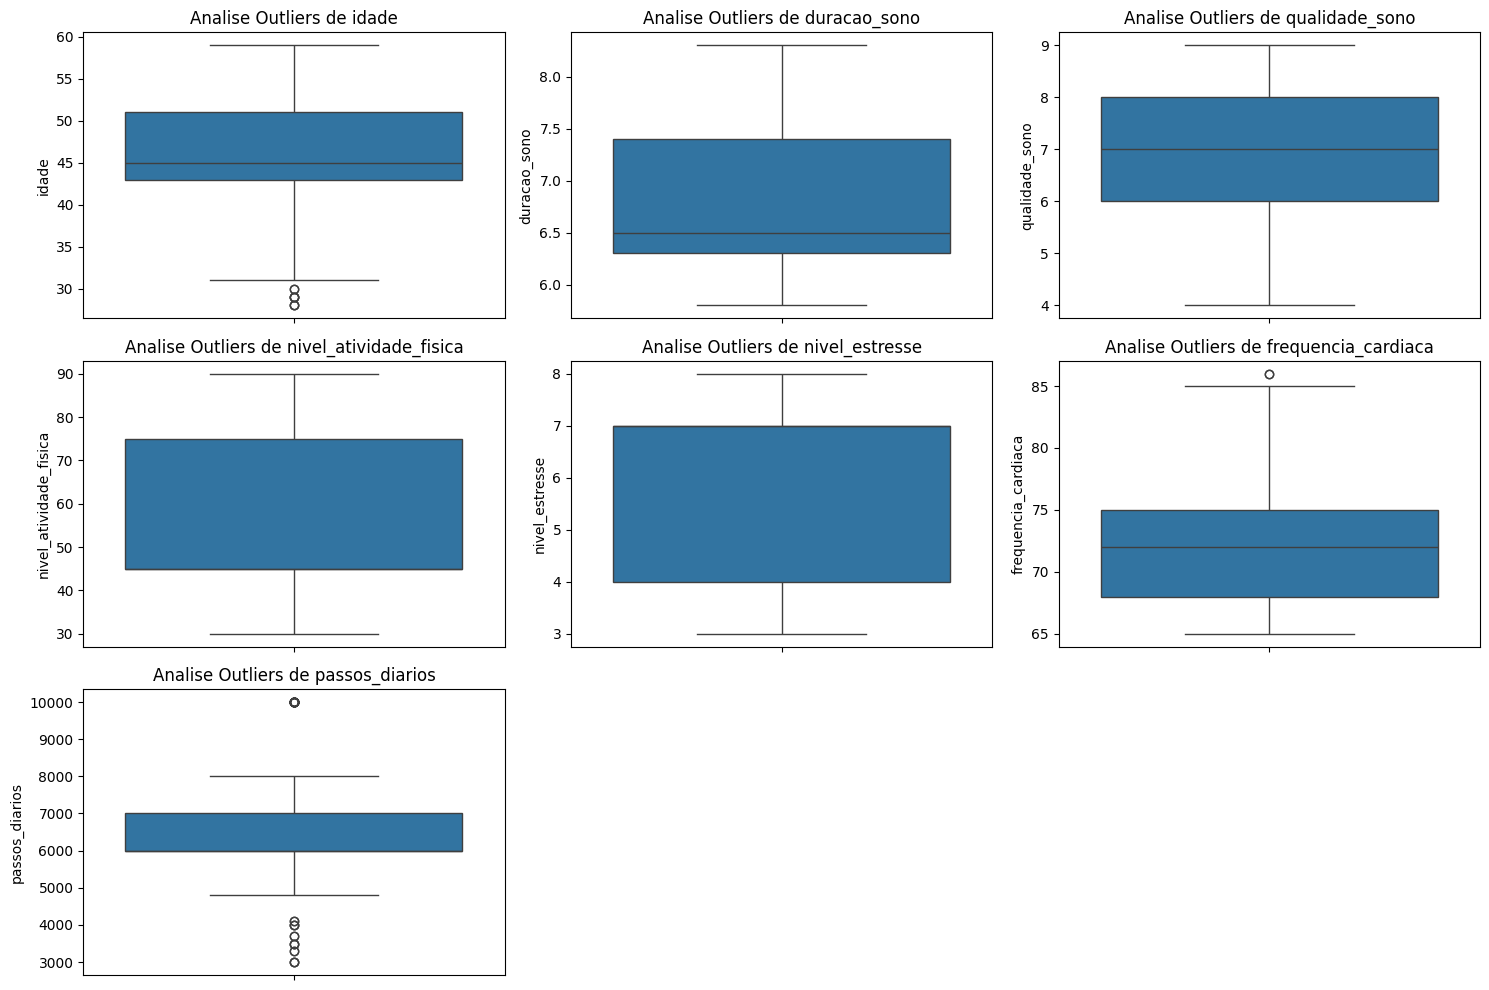

In [15]:
#OBTÉM GRÁFICOS BOXPLOTS PARA AVALIAÇÃO DOS OUTLIERS

plt.figure(figsize=(15,10))
for i, col in enumerate(num_col):
    plt.subplot(3,3, i+1)
    sns.boxplot(y=df_disturbios[col])
    plt.title(f'Analise Outliers de {col}')
    plt.tight_layout()
   # plt.savefig('boxplots_outliers.png')
   # plt.close()    

### Análise para Enriquecimento dos Dados

In [16]:
#RETIRADA DE VARIÁVEIS IRRELEVANTES PARA OBTER O MODELO

df_tratados = df_disturbios.drop(columns = ['id', 'ocupacao'])


In [17]:
#EXTRAÇÃO DE VALORES NUMÉRICOS DA PRESSÃO SANGUÍNEA
df_tratados["pressao_sistolica"] = df_tratados["pressao_sanguinea"].apply(lambda x: int(x.split('/')[0]))
df_tratados["pressao_distolica"] = df_tratados["pressao_sanguinea"].apply(lambda x: int(x.split('/')[1]))

In [18]:
#VERIFICAÇÃO DO RESULTADO DA EXTRAÇÃO
print(df_tratados[['pressao_sanguinea','pressao_sistolica','pressao_distolica']].head(10))

   pressao_sanguinea  pressao_sistolica  pressao_distolica
3             140/90                140                 90
4             140/90                140                 90
5             140/90                140                 90
6             140/90                140                 90
16            132/87                132                 87
17            120/80                120                 80
18            132/87                132                 87
30            130/86                130                 86
31            130/86                130                 86
49            120/80                120                 80


In [19]:
#MOSTRA O DATAFRAME EM FORMATO DE TABELA
df_tratados.head(10).style.set_table_attributes("border='1' class='dataframe'").set_caption("Saúde do Sono")

,genero,idade,duracao_sono,qualidade_sono,nivel_atividade_fisica,nivel_estresse,imc,pressao_sanguinea,frequencia_cardiaca,passos_diarios,disturbio_sono,pressao_sistolica,pressao_distolica
3,Male,28,5.900000,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90
4,Male,28,5.900000,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90
5,Male,28,5.900000,4,30,8,Obese,140/90,85,3000,Insomnia,140,90
6,Male,29,6.300000,6,40,7,Obese,140/90,82,3500,Insomnia,140,90
16,Female,29,6.500000,5,40,7,Normal Weight,132/87,80,4000,Sleep Apnea,132,87
17,Male,29,6.000000,6,30,8,Normal,120/80,70,8000,Sleep Apnea,120,80
18,Female,29,6.500000,5,40,7,Normal Weight,132/87,80,4000,Insomnia,132,87
30,Female,30,6.400000,5,35,7,Normal Weight,130/86,78,4100,Sleep Apnea,130,86
31,Female,30,6.400000,5,35,7,Normal Weight,130/86,78,4100,Insomnia,130,86
49,Male,31,7.700000,7,75,6,Normal,120/80,70,8000,Sleep Apnea,120,80


In [20]:
#PREPARAÇÃO DE DADOS PARA CLUSTERIZAÇÃO

#SEPARA COLUNAS NUMÉRICAS E CATEGÓRICAS
num_col = ["idade", "duracao_sono", "qualidade_sono", "nivel_atividade_fisica", "nivel_estresse", "frequencia_cardiaca","passos_diarios", 
           "pressao_sistolica", "pressao_distolica"]

cat_col = ["genero","imc"]

In [21]:
#CRIA PREPOCESSADOR PARA TRANSFORMAR OS DADOS
preprocessor = ColumnTransformer(
    transformers = [
        ('num', StandardScaler(), num_col),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_col)
    ]
)

#APLICA TRANSFORMAÇÕES
X = preprocessor.fit_transform(df_tratados)
print(f"\n Dimensões dos dados após transformação: {X.shape}")


 Dimensões dos dados após transformação: (155, 15)


### Análise Exploratória

#### Análise Univariada

In [22]:
#ANALISE UNIVARIADA

#Estatísticas descritivas das variáveis numéricas por distúrbio do sono
print("\nEstatísticas descritivas por distúrbio do sono:")

for disorder in df_tratados["disturbio_sono"].unique():
    subset = df_tratados[df_tratados["disturbio_sono"] == disorder]
    print(f"\n {disorder} (n={len(subset)}):")
    print(subset[num_col].describe().round(2))



Estatísticas descritivas por distúrbio do sono:

 Sleep Apnea (n=78):
       idade  duracao_sono  qualidade_sono  nivel_atividade_fisica  \
count  78.00         78.00           78.00                   78.00   
mean   49.71          7.03            7.21                   74.79   
std     8.99          0.97            1.65                   17.93   
min    28.00          5.80            4.00                   30.00   
25%    49.00          6.10            6.00                   75.00   
50%    50.00          6.80            6.00                   75.00   
75%    57.75          8.10            9.00                   90.00   
max    59.00          8.20            9.00                   90.00   

       nivel_estresse  frequencia_cardiaca  passos_diarios  pressao_sistolica  \
count           78.00                78.00           78.00              78.00   
mean             5.67                73.09         7619.23             137.77   
std              2.33                 5.12         2168

In [23]:
#Distribuição de variáveis categóricas
print("\nDistribuição de gênero por distúrbio do sono:")
print(pd.crosstab(df_tratados["disturbio_sono"],
                  df_tratados['genero'], normalize='index') * 100)


Distribuição de gênero por distúrbio do sono:
genero             Female       Male
disturbio_sono                      
Insomnia        46.753247  53.246753
Sleep Apnea     85.897436  14.102564


In [24]:
#Distribuição de variáveis categóricas

print("\n Distribuição de categorias de IMC por distúrbio do sono:")
print(pd.crosstab(df_tratados['disturbio_sono'],
 df_tratados['imc'], normalize='index') * 100)


 Distribuição de categorias de IMC por distúrbio do sono:
imc               Normal  Normal Weight     Obese  Overweight
disturbio_sono                                               
Insomnia        9.090909       2.597403  5.194805   83.116883
Sleep Apnea     6.410256       2.564103  7.692308   83.333333


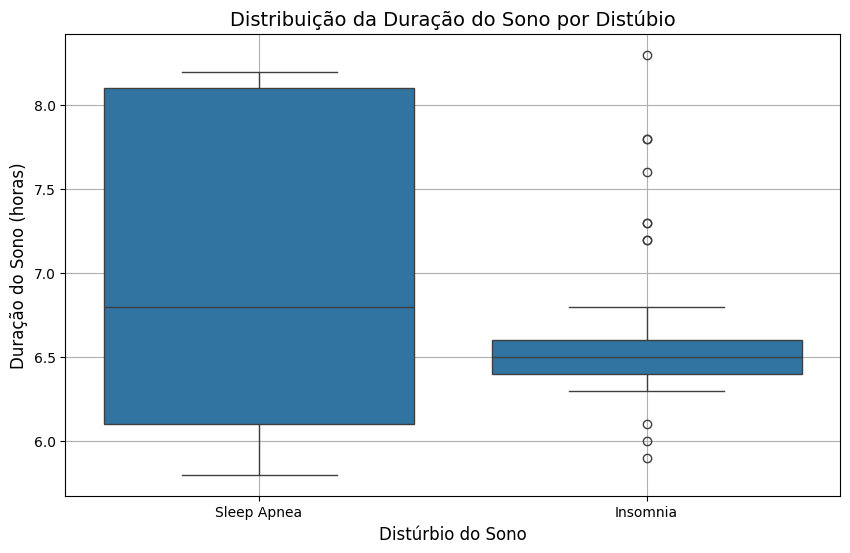

In [25]:
#VISUALIZAÇÃO DA DISTRIBUIÇÃO DA DURAÇÃO DO SONO POR DISTÚRBIO
plt.figure(figsize=(10,6))
sns.boxplot(
    x="disturbio_sono", y = "duracao_sono",
    data=df_tratados
)
plt.title("Distribuição da Duração do Sono por Distúbio", fontsize=14)
plt.xlabel("Distúrbio do Sono", fontsize=12)
plt.ylabel("Duração do Sono (horas)", fontsize=12)
plt.grid(True)

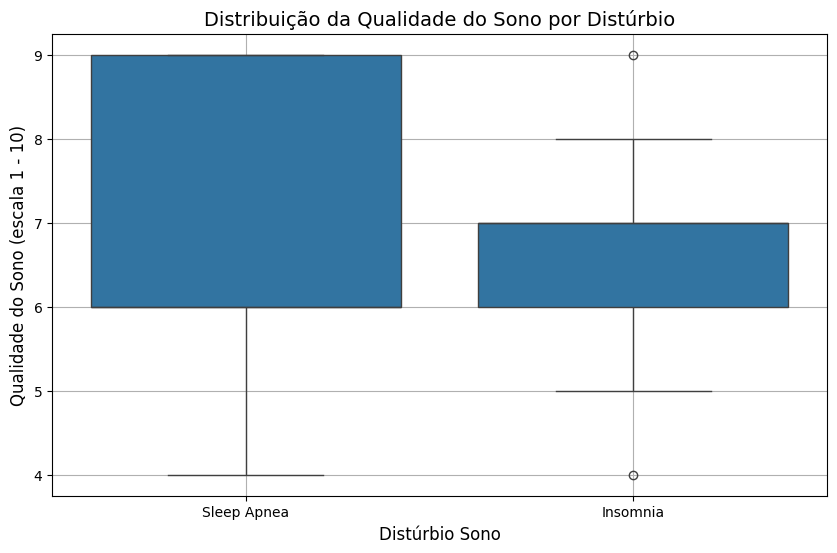

In [26]:
#VISUALIZACAO DA DISTRIBUIÇÃO DA QUALIDADE DO SONO POR DISTÚRBIO
plt.figure(figsize=(10,6))
sns.boxplot(x='disturbio_sono', y='qualidade_sono', data=df_tratados)
plt.title("Distribuição da Qualidade do Sono por Distúrbio", fontsize=14)
plt.xlabel("Distúrbio Sono", fontsize=12)
plt.ylabel("Qualidade do Sono (escala 1 - 10)", fontsize=12)
plt.grid(True)

#### Análise Multivariada

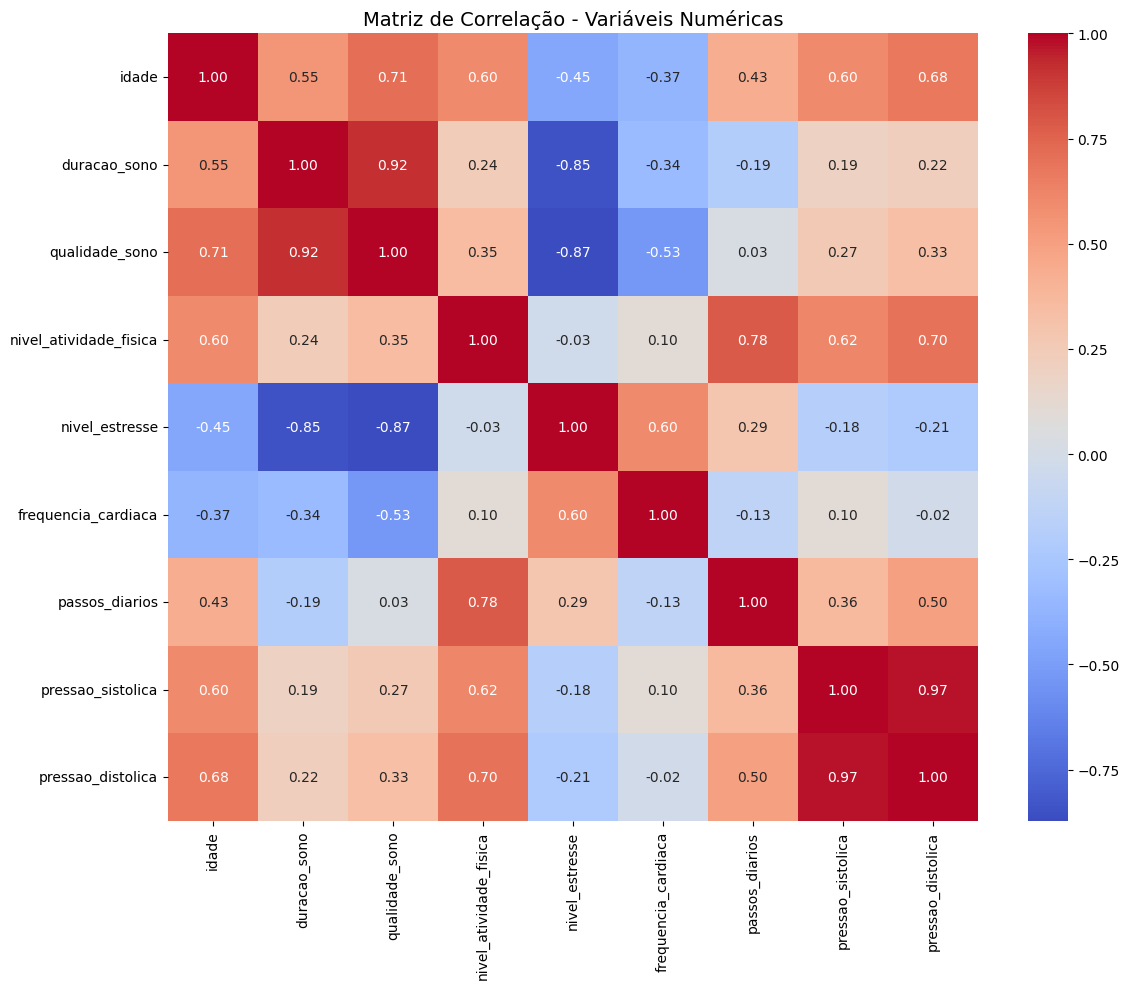

In [27]:
#MATRIZ DE CORRELAÇÃO PARA VARIÁVEIS NUMÉRICAS
plt.figure(figsize=(12,10))
correlation_matriz = df_tratados[num_col].corr()
sns.heatmap(correlation_matriz, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação - Variáveis Numéricas', fontsize=14)
plt.tight_layout()

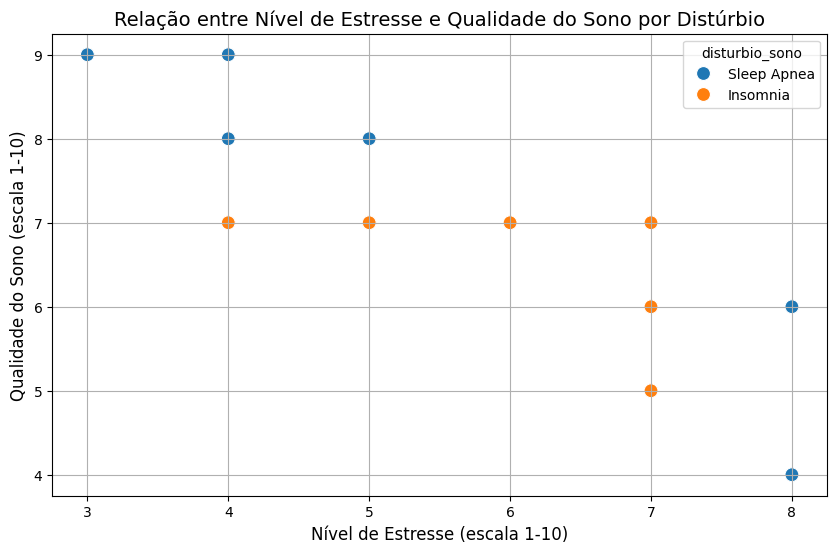

In [28]:
#RELAÇÃO ENTRE NÍVEL DE ESTRESSE E QUALIDADE DO SONO POR DISTÚRBIO
plt.figure(figsize=(10,6))
sns.scatterplot(x='nivel_estresse', y='qualidade_sono', hue='disturbio_sono', data=df_tratados, s=100)
plt.title('Relação entre Nível de Estresse e Qualidade do Sono por Distúrbio', fontsize=14)
plt.xlabel('Nível de Estresse (escala 1-10)', fontsize=12)
plt.ylabel('Qualidade do Sono (escala 1-10)', fontsize=12)
plt.grid(True)

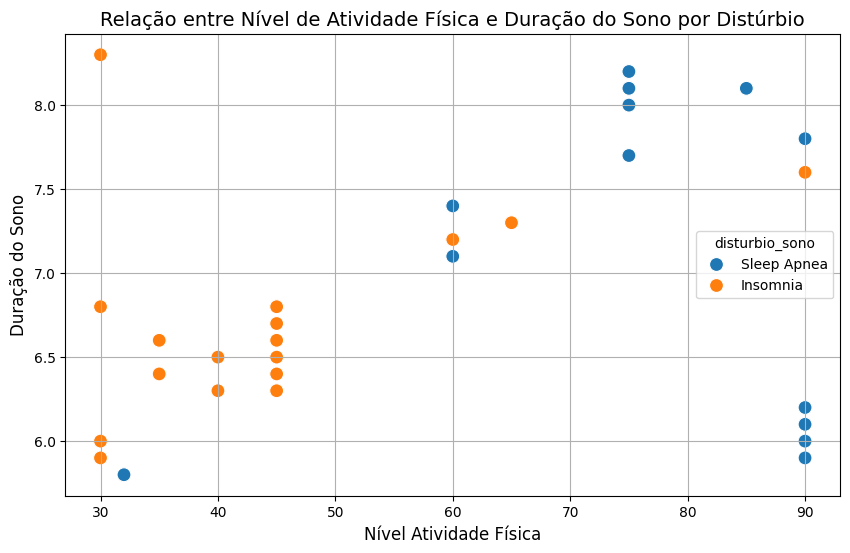

In [29]:
#RELAÇÃO ENTRE NÍVEL DE ATIVIDADE FÍSICA E DURAÇÃO DO SONO POR DISTÚRBIO
plt.figure(figsize=(10,6))
sns.scatterplot(x='nivel_atividade_fisica', y='duracao_sono', hue='disturbio_sono', data=df_tratados, s=100)
plt.title('Relação entre Nível de Atividade Física e Duração do Sono por Distúrbio', fontsize=14)
plt.xlabel('Nível Atividade Física', fontsize=12)
plt.ylabel('Duração do Sono', fontsize=12)
plt.grid(True)

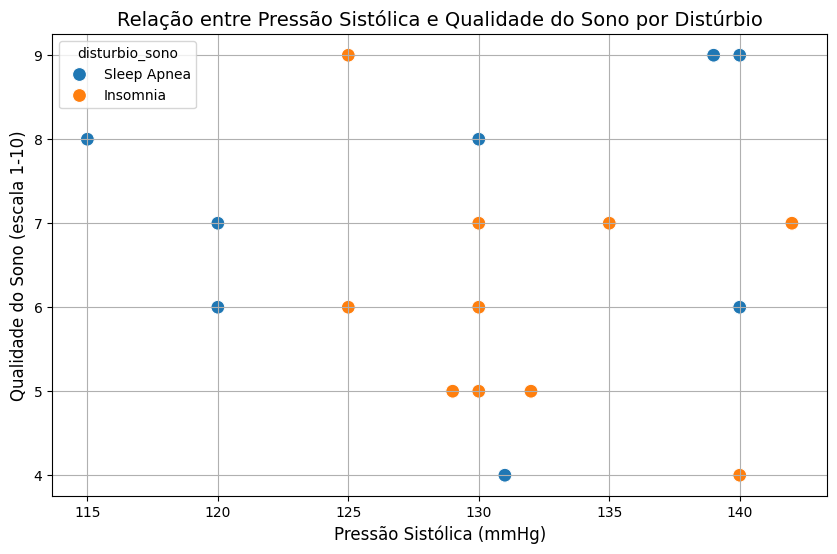

In [28]:
#RELAÇÃO ENTRE NÍVEL DE PRESSAO ARTERIAL E QUALIDADE DO SONO POR DISTÚRBIO
plt.figure(figsize=(10,6))
sns.scatterplot(x='pressao_sistolica', y='qualidade_sono', hue='disturbio_sono', data=df_tratados, s=100)
plt.title('Relação entre Pressão Sistólica e Qualidade do Sono por Distúrbio', fontsize=14)
plt.xlabel('Pressão Sistólica (mmHg)', fontsize=12)
plt.ylabel('Qualidade do Sono (escala 1-10)', fontsize=12)
plt.grid(True)

### Modeling

##### K-Means

In [30]:
#DETERMINAR O NÚMERO IDEAL DE CLUSTERS USANDO O MÉTODO DO COTOVELO E SCORE DE SILHUETA

#ARMAZENA O VALOR DE INERCIA (SOMA DAS DISTÂNCIAS DOS PONTOS AO CENTRO DO CLUSTER)
inertia =[]

#ARMAZENA OS SCORES DE SILHUETTA, QUE MEDEM A QUALIDADE DA SEPARAÇÃO ENTRE CLUSTERS
silhouette_vals = []

#DEFINE A QUANTIDADE DE CLUSTERS PARA TESTAR
k_range = range(2,11)


In [32]:
#LOOP PARA TESTAR OS DIFERENTES VALORES DE K
for k in k_range:
    #TREINAMENTO MODELO K-MEANS (N_CLUSTERS = K)
    kmeans = KMeans(n_clusters=k, random_state=42, n_init = 10)
    kmeans.fit(X)
    #ARMAZENAMENTO DA INERCIA DO MODELO
    inertia.append(kmeans.inertia_)

    labels = kmeans.labels_
    #SCORE DE SILHUETA CALCULADO E ARMAZENADO
    kmeans_silhouette = silhouette_score(X, labels)
    silhouette_vals.append(kmeans_silhouette)

print(f"Score de silhueta para K-means: {kmeans_silhouette:.4f}")

Score de silhueta para K-means: 0.7786


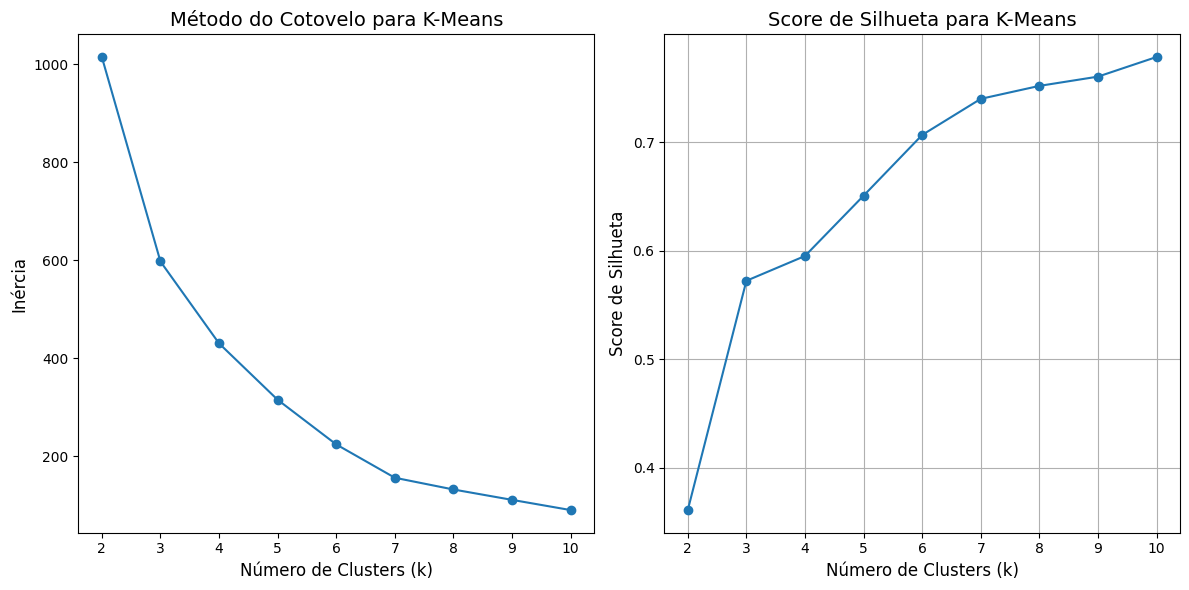

In [33]:
#PLOTAR GRÁFICO DO MÉTODO COTOVELO E SCORE SILHUETA
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(k_range, inertia, 'o-')
plt.xlabel("Número de Clusters (k)", fontsize=12)
plt.ylabel("Inércia", fontsize=12)
plt.title("Método do Cotovelo para K-Means", fontsize=14)

plt.subplot(1,2,2)
plt.plot(k_range, silhouette_vals, 'o-')
plt.xlabel("Número de Clusters (k)", fontsize=12)
plt.ylabel("Score de Silhueta", fontsize=12)
plt.title("Score de Silhueta para K-Means", fontsize=14)
plt.grid(True)
plt.tight_layout()

In [34]:
#DETERMINAR O NÚMERO IDEAL DE CLUSTERS
kl = KneeLocator(k_range, inertia, curve='convex', direction='decreasing')
optimal_k = kl.elbow

if optimal_k is None:
    optimal_k = K_range[np.argmax(silhouette_score)]

print(f'Número ideal de clusters determinado: {optimal_k}')

Número ideal de clusters determinado: 4


In [35]:
#APLICAR K-MEANS COM O NÚMERO IDEAL DE CLUSTERS
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X)

#### DBSCAN

In [36]:
#DETERMINAR PARÂMETROS PARA DBSCAN
#NÚMERO DE VIZINHOS A CONSIDERAR
K = 5

vizinho = NearestNeighbors(n_neighbors=k)
vizinho.fit(X)

distancias, indices = vizinho.kneighbors(X)
distancias = np.sort(distancias[:, k-1])

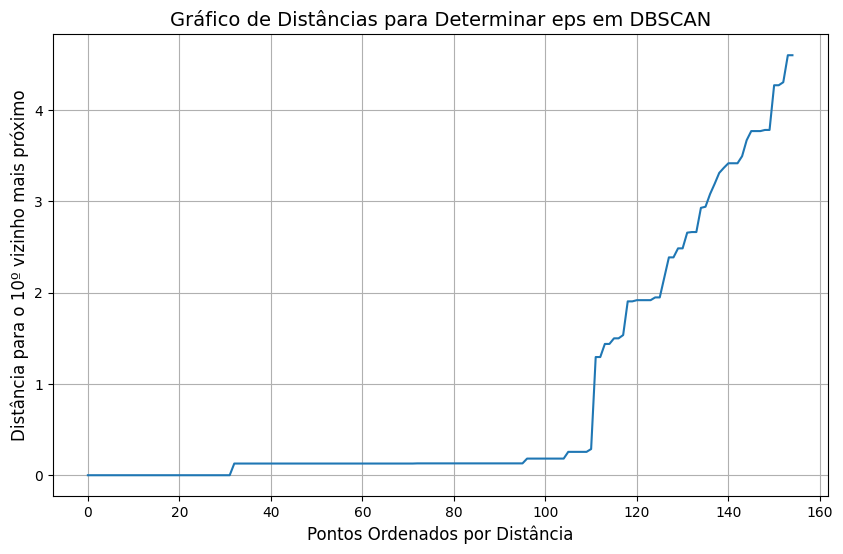

In [37]:
#PLOTAR O GRÁFICO DE DISTÂNCIAS PARA DETERMINAR O EPS
plt.figure(figsize=(10,6))
plt.plot(distancias)
plt.xlabel('Pontos Ordenados por Distância', fontsize=12)
plt.ylabel(f'Distância para o {k}º vizinho mais próximo', fontsize=12)
plt.title('Gráfico de Distâncias para Determinar eps em DBSCAN', fontsize=14)
plt.grid(True)

In [38]:
#DETERMINAR O VALOR EPS

kl_dbscan = KneeLocator(range(len(distancias)), distancias, curve='convex', direction='increasing')
eps_value = distancias[kl_dbscan.elbow] if kl_dbscan.elbow is not None else np.percentile(distancias, 90)

print(f'Valor de eps determinado para DBSCAN: {eps_value: .4f}')

Valor de eps determinado para DBSCAN:  3.7828


In [39]:
#APLICAÇÃO DBSCAN
dbscan = DBSCAN(eps=eps_value, min_samples=k)
dbscan_labels = dbscan.fit_predict(X)

In [40]:
#CONTAR O NÚMERO DE CLUSTERS E PONTOS DE RUÍDO
n_clusters_dbscan = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise_dbscan = list(dbscan_labels).count(-1)

print(f"DBSCAN encontrou {n_clusters_dbscan} clusters e {n_noise_dbscan} pontos de ruído")

DBSCAN encontrou 2 clusters e 1 pontos de ruído


In [41]:
#ADICIONAR IS RÓTULOS DE CLUSTER AO DATAFRAME ORIGINAL
df_tratados['cluster_kmeans'] = kmeans_labels
df_tratados['cluster_dbscan'] = dbscan_labels

In [42]:
#MOSTRA O SCORE DE SILHUETA CALCULADO ANTERIORMENTE PARA K-MEANS
print(f"Score de silhueta para K-means: {kmeans_silhouette:.4f}")

#CÁLCULO DO SCORE DE SILHUETA PARA DBSCAN (EXCLUINDO PONTOS DE RUÍDO)
if n_clusters_dbscan > 1:
    #FILTRA PONTOS QUE NÃO SÃO RUÍDOS
    mask = dbscan_labels != -1
    dbscan_silhouette = silhouette_score(X[mask], dbscan_labels[mask])

    print(f"Score de silhueta para DBSCAN: {dbscan_silhouette:.4f}")
else:
    print("DBSCAN não encontrou clusters suficientes para calcular o score de silhueta")

Score de silhueta para K-means: 0.7786
Score de silhueta para DBSCAN: 0.3906


#### PCA

In [43]:
#APLICAÇÃO DE PCA PARA VISUALIZAÇÃO EM 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

#CRIAÇÃO DE DATAFRAME COM RESULTADOS DO PCA
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['cluster_kmeans'] = kmeans_labels
pca_df['cluster_dbscan'] = dbscan_labels
pca_df['disturbio_sono'] = df_tratados['disturbio_sono'].values

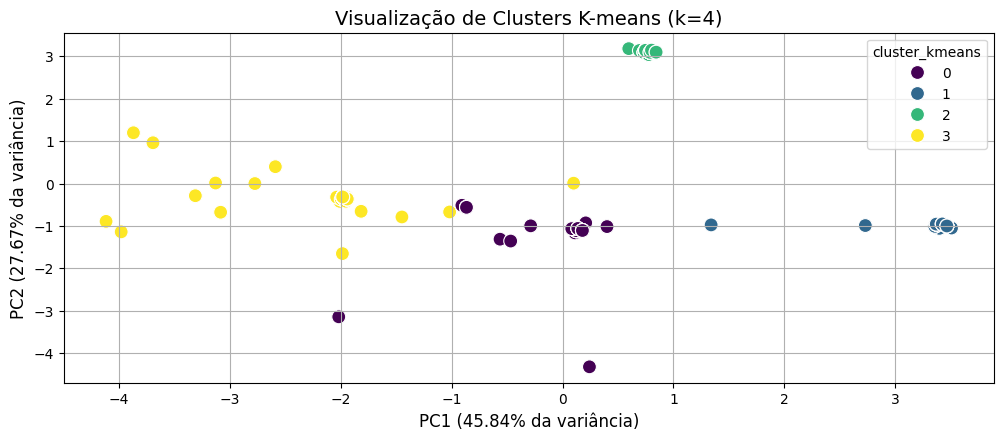

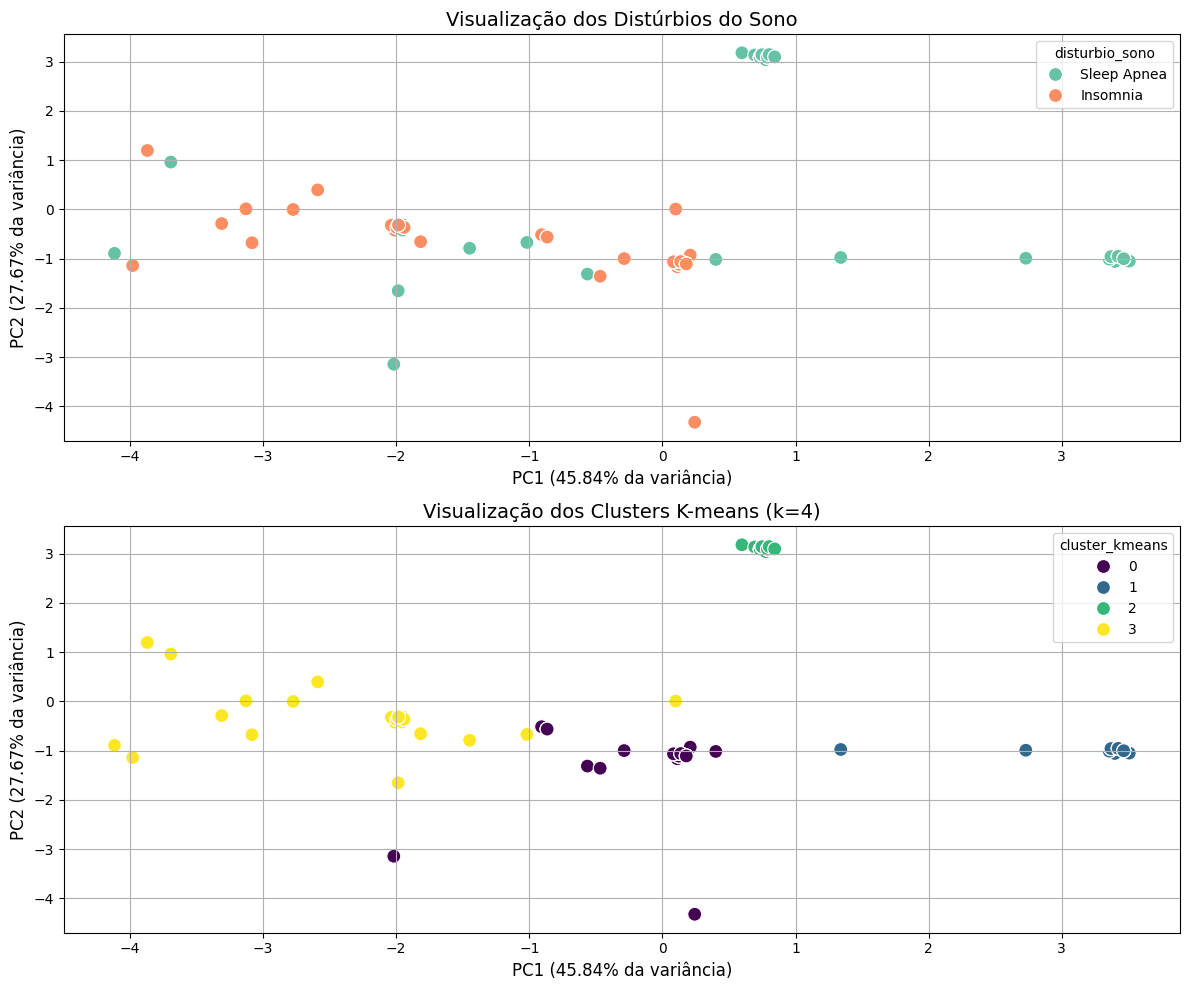

In [44]:
#VISUALIZAR CLUSTERS K-MEANS NO ESPAÇO PCA
plt.figure(figsize=(12,10))
plt.subplot(2,1,1)
sns.scatterplot(x='PC1', y='PC2', hue = 'cluster_kmeans', palette='viridis', data=pca_df, s=100)
plt.title(f'Visualização de Clusters K-means (k={optimal_k})', fontsize=14)
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} da variância)', fontsize=12)
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} da variância)', fontsize=12)
plt.grid(True)

 # COMPARAÇÃO DE CLUSTERS COM DISTÚRBIOS DO SONO
plt.figure(figsize=(12, 10))
plt.subplot(2, 1, 1)
sns.scatterplot(x='PC1', y='PC2', hue='disturbio_sono', palette='Set2', data=pca_df, s=100)
plt.title('Visualização dos Distúrbios do Sono', fontsize=14)
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} da variância)', fontsize=12)
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} da variância)', fontsize=12)
plt.grid(True)

plt.subplot(2, 1, 2)
sns.scatterplot(x='PC1', y='PC2', hue='cluster_kmeans', palette='viridis', data=pca_df, s=100)
plt.title(f'Visualização dos Clusters K-means (k={optimal_k})', fontsize=14)
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} da variância)', fontsize=12)
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} da variância)', fontsize=12)
plt.grid(True)
plt.tight_layout()

#### Análise dos clustes

In [45]:
#ANALISAR CARACTERISTICAS DOS CLUSTERS K-MEANS
analise_clusters = df_tratados.groupby('cluster_kmeans').agg({
 'idade': 'mean',
 'duracao_sono': 'mean',
 'qualidade_sono': 'mean',
 'nivel_atividade_fisica': 'mean',
 'nivel_estresse': 'mean',
 'frequencia_cardiaca': 'mean',
 'passos_diarios': 'mean',
 'pressao_sistolica': 'mean',
 'pressao_distolica': 'mean'
 }).round(2)

print("\nCaracterísticas médias dos clusters K-means:")
print(analise_clusters)


Características médias dos clusters K-means:
                idade  duracao_sono  qualidade_sono  nivel_atividade_fisica  \
cluster_kmeans                                                                
0               44.80          6.81            7.25                   49.88   
1               57.44          8.10            9.00                   75.62   
2               49.77          6.06            6.00                   90.00   
3               39.72          6.46            5.79                   43.85   

                nivel_estresse  frequencia_cardiaca  passos_diarios  \
cluster_kmeans                                                        
0                         4.68                66.85         6325.00   
1                         3.06                69.38         6668.75   
2                         8.00                75.00        10000.00   
3                         6.96                75.15         5326.42   

                pressao_sistolica  pressao_distolica

In [46]:
#AVALIAR A DISTRIBUIÇÃO DE DISTÚRBIOS DO SONO POR CLUSTER
disturbio_sono_analise = pd.crosstab(df_tratados['cluster_kmeans'], df_tratados['disturbio_sono'])

print("\nDistribuição de distúrbios do sono por cluster Kmeans:")
print(disturbio_sono_analise)


Distribuição de distúrbios do sono por cluster Kmeans:
disturbio_sono  Insomnia  Sleep Apnea
cluster_kmeans                       
0                     37            3
1                      0           32
2                      1           29
3                     39           14


<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

<Figure size 1200x600 with 0 Axes>

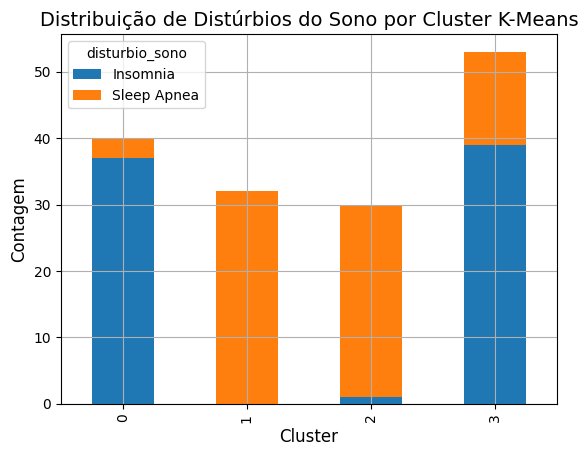

In [47]:
#VISUALIZAR A DISTRIBUIÇÃO DE DISTÚRBIOS DO SONO POR CLUSTER
plt.figure(figsize=(12,6))
disturbio_sono_analise.plot(kind='bar', stacked='True')
plt.title('Distribuição de Distúrbios do Sono por Cluster K-Means', fontsize=14)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Contagem', fontsize=12)
plt.grid(True)
plt.tight_layout


#### Análise Detalhada dos Fenótipos

In [48]:
#ANÁLISE DETALHADA DOS CLUSTERS K-MEANS
print("Análise detalhada dos fenótipos clínicos identificados:")
for cluster in sorted(df_tratados['cluster_kmeans'].unique()):
    cluster_data = df_tratados[df_tratados['cluster_kmeans'] == cluster]
    print(f"\nFenótipo {cluster+1} (Cluster {cluster} - {len(cluster_data)} indivíduos)")

    #DISTRIBUIÇÃO DE GÊNERO
    genero_dist = cluster_data['genero'].value_counts(normalize=True) *100
    print(f"Distribuição de gênero: {genero_dist.to_dict()}")

    #DISTRIBUIÇÃO DE IMC
    imc_dist = cluster_data['imc'].value_counts(normalize=True) *100
    print(f"Distribuição de IMC: {imc_dist.to_dict()}")

    #DISTRIBUIÇÃO DE DISTURBIOS DO SONO
    imc_dist = cluster_data['imc'].value_counts(normalize=True) *100
    print(f"Distribuição de IMC: {imc_dist.to_dict()}")
    disturbio_sono_dist = cluster_data['disturbio_sono'].value_counts(normalize=True) *100
    print(f"Distribuição de Distúrbios do sono: {disturbio_sono_dist.to_dict()}")

    #ESTATÍSTICAS DAS CARACTERíSTICAS NUMÉRICAS
    stats = cluster_data[num_col].describe().round(2)
    print("Estatísticas das características numéricas:")
    print(stats.loc[['mean', 'std', 'min', 'max']])

Análise detalhada dos fenótipos clínicos identificados:

Fenótipo 1 (Cluster 0 - 40 indivíduos)
Distribuição de gênero: {'Female': 85.0, 'Male': 15.0}
Distribuição de IMC: {'Overweight': 77.5, 'Normal': 22.5}
Distribuição de IMC: {'Overweight': 77.5, 'Normal': 22.5}
Distribuição de Distúrbios do sono: {'Insomnia': 92.5, 'Sleep Apnea': 7.5}
Estatísticas das características numéricas:
      idade  duracao_sono  qualidade_sono  nivel_atividade_fisica  \
mean   44.8          6.81            7.25                   49.88   
std     4.1          0.45            0.49                   14.96   
min    36.0          6.50            7.00                   30.00   
max    53.0          8.30            9.00                   90.00   

      nivel_estresse  frequencia_cardiaca  passos_diarios  pressao_sistolica  \
mean            4.68                66.85         6325.00             132.25   
std             1.14                 2.74          764.18               4.80   
min             3.00        

#### Análise Comparativa dos Fenótipos

##### Padrões de Sono

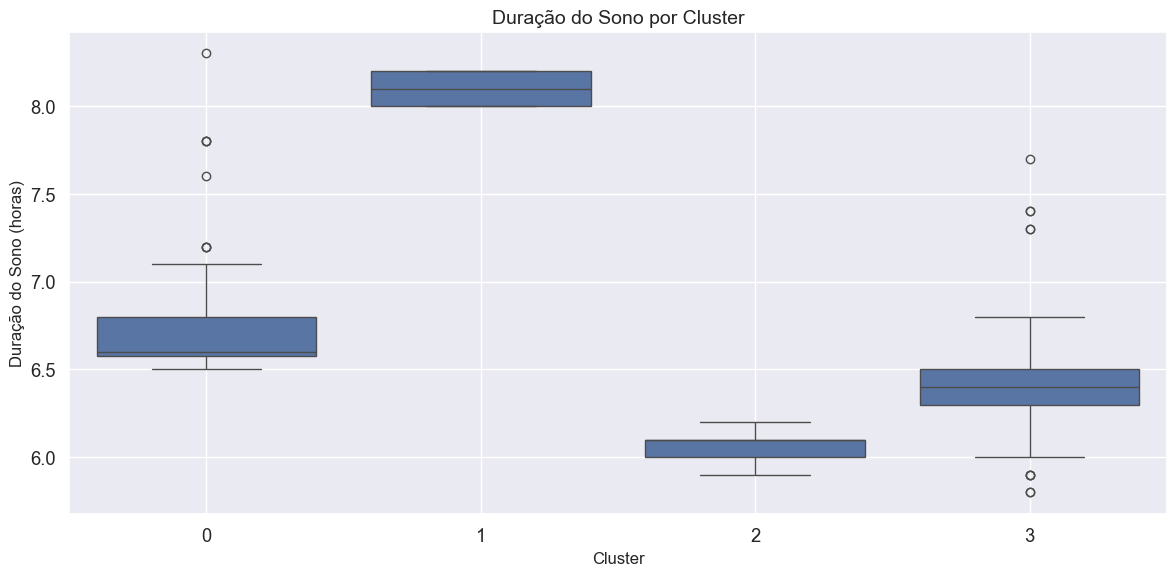

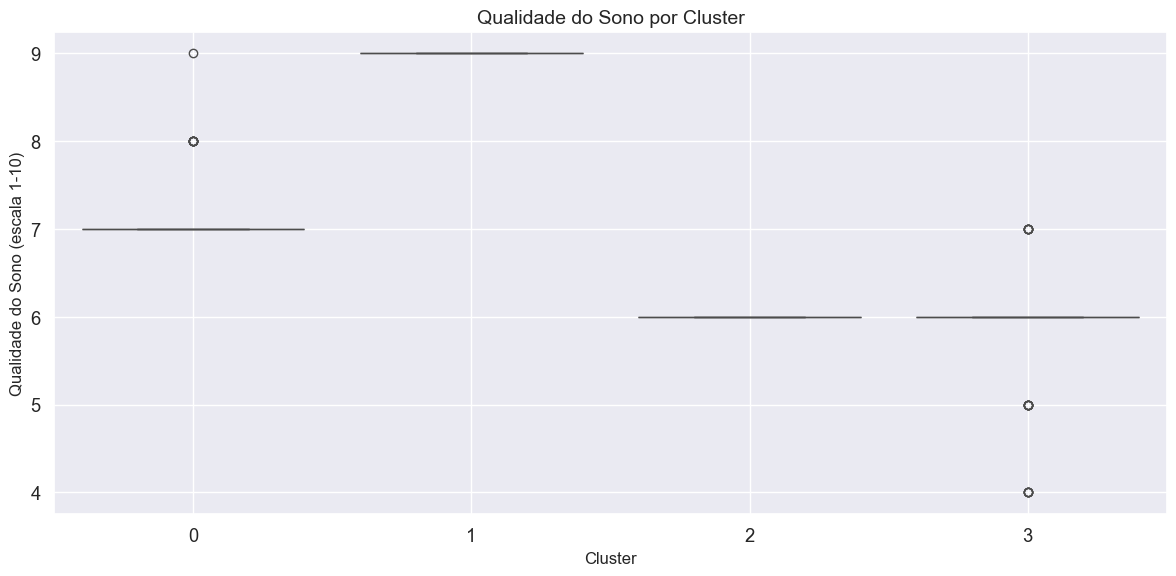

In [ ]:
#PLOTANDO GRÁFICOS PARA MELHOR VISUALIZAÇÃO

#CONFIGURAÇÕES PARA MELHOR VISUALIZAÇÃO
plt.style.use('seaborn-v0_8-whitegrid')
sns.set(font_scale=1.2)
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['axes.grid'] = True

#DURAÇÃO DO SONO POR CLUSTER
plt.figure(figsize=(12,6))
sns.boxplot(x='cluster_kmeans', y='duracao_sono', data=df_tratados)
plt.title('Duração do Sono por Cluster', fontsize=14)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Duração do Sono (horas)', fontsize=12)
plt.grid(True)
plt.tight_layout()

#QUALIDADE DO SONO POR CLUSTER
plt.figure(figsize=(12,6))
sns.boxplot(x='cluster_kmeans', y='qualidade_sono', data=df_tratados)
plt.title('Qualidade do Sono por Cluster', fontsize=14)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Qualidade do Sono (escala 1-10)', fontsize=12)
plt.grid(True)
plt.tight_layout()



##### Parâmetros Cardiovasculares

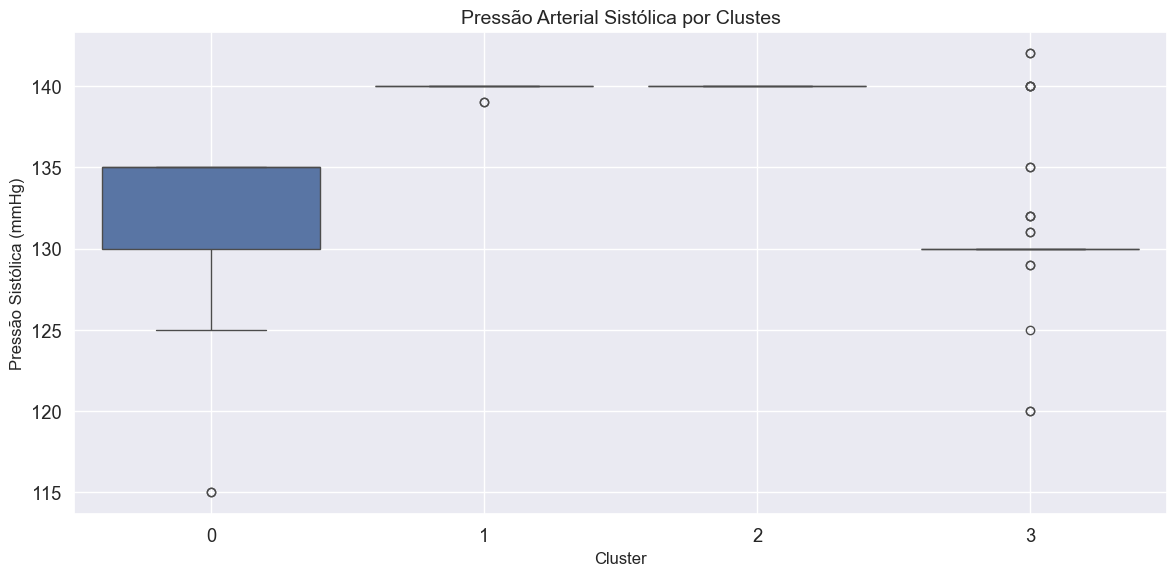

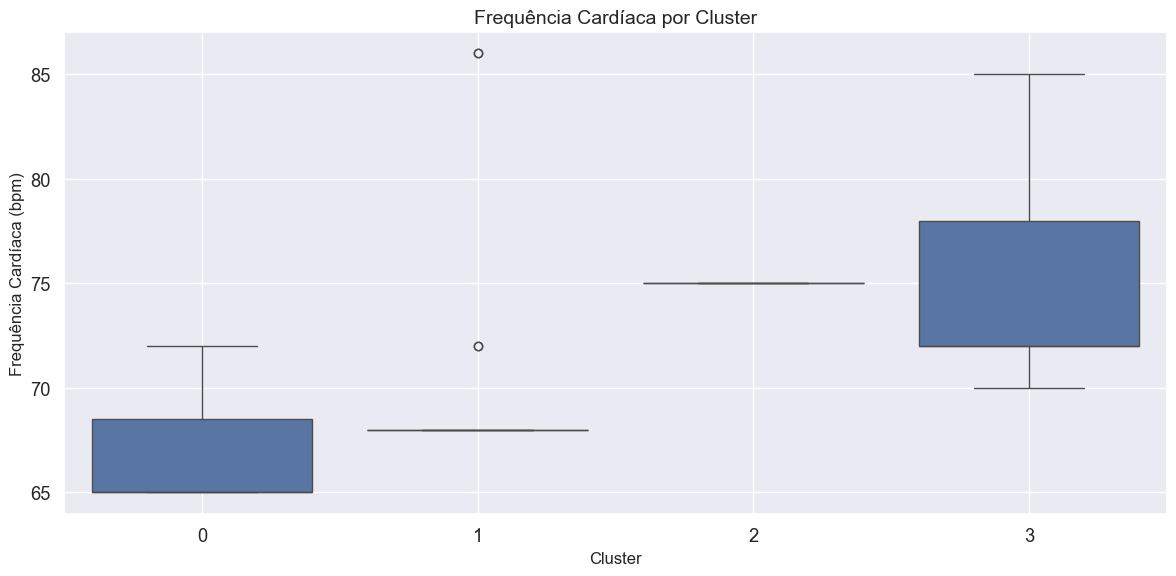

In [54]:
#CONFIGURAÇÕES PARA MELHOR VISUALIZAÇÃO
plt.style.use('seaborn-v0_8-whitegrid')
sns.set(font_scale=1.2)
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['axes.grid'] = True

#PRESSAO ARTERIAL POR CLUSTER
plt.figure(figsize=(12,6))
sns.boxplot(x='cluster_kmeans', y='pressao_sistolica', data=df_tratados)
plt.title('Pressão Arterial Sistólica por Clustes', fontsize=14)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Pressão Sistólica (mmHg)', fontsize=12)
plt.grid(True)
plt.tight_layout()

#FREQUENCIA CARDIACA POR CLUSTER
plt.figure(figsize=(12,6))
sns.boxplot(x='cluster_kmeans', y='frequencia_cardiaca', data=df_tratados)
plt.title('Frequência Cardíaca por Cluster', fontsize=14)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Frequência Cardíaca (bpm)', fontsize=12)
plt.grid(True)
plt.tight_layout()

##### Fatores Comportamentais

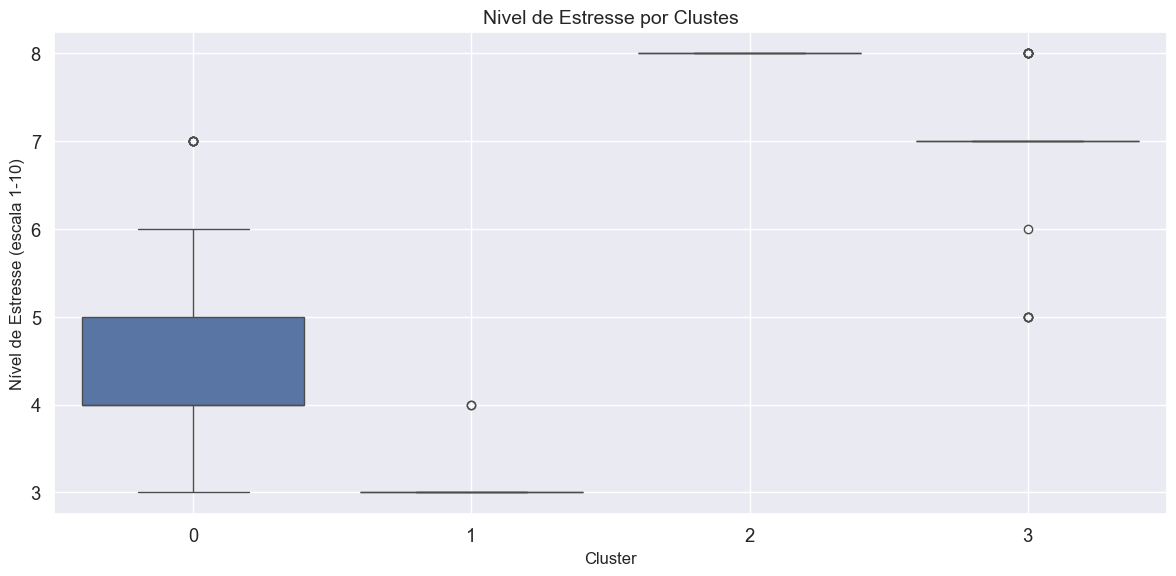

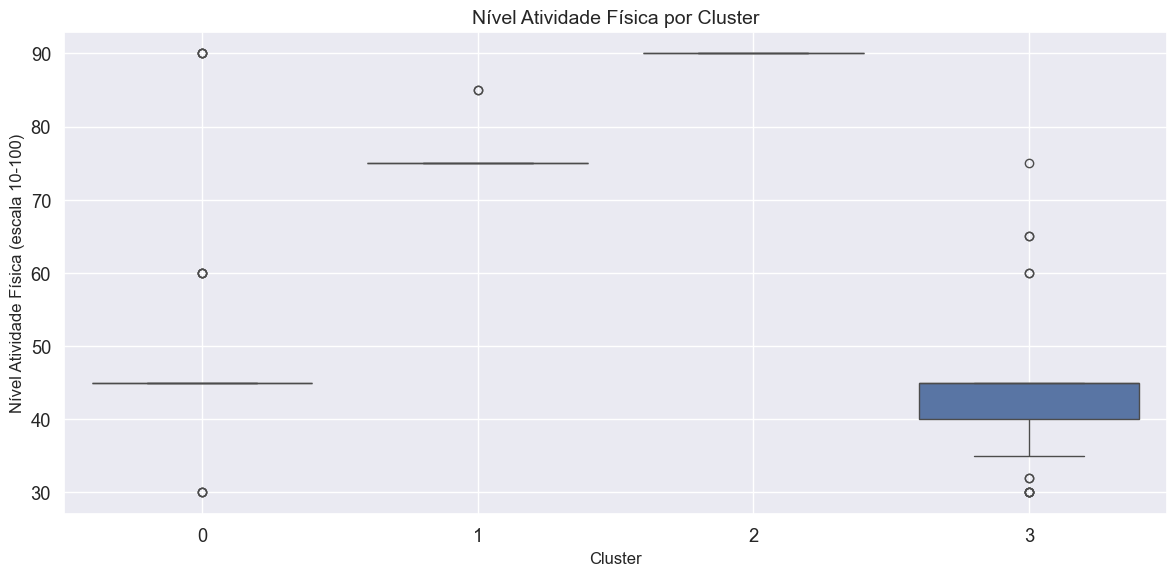

In [56]:
#CONFIGURAÇÕES PARA MELHOR VISUALIZAÇÃO
plt.style.use('seaborn-v0_8-whitegrid')
sns.set(font_scale=1.2)
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['axes.grid'] = True

#NIVEL DE ESTRESSE POR CLUSTER
plt.figure(figsize=(12,6))
sns.boxplot(x='cluster_kmeans', y='nivel_estresse', data=df_tratados)
plt.title('Nivel de Estresse por Clustes', fontsize=14)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Nível de Estresse (escala 1-10)', fontsize=12)
plt.grid(True)
plt.tight_layout()

#NIVEL ATIVIDADE FISICA POR CLUSTER
plt.figure(figsize=(12,6))
sns.boxplot(x='cluster_kmeans', y='nivel_atividade_fisica', data=df_tratados)
plt.title('Nível Atividade Física por Cluster', fontsize=14)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Nível Atividade Física (escala 10-100)', fontsize=12)
plt.grid(True)
plt.tight_layout()

##### Correlações Fisiopatológicas

In [57]:
num_col = ["idade", "duracao_sono", "qualidade_sono", "nivel_atividade_fisica", "nivel_estresse", "frequencia_cardiaca","passos_diarios", "pressao_sistolica", "pressao_distolica"]

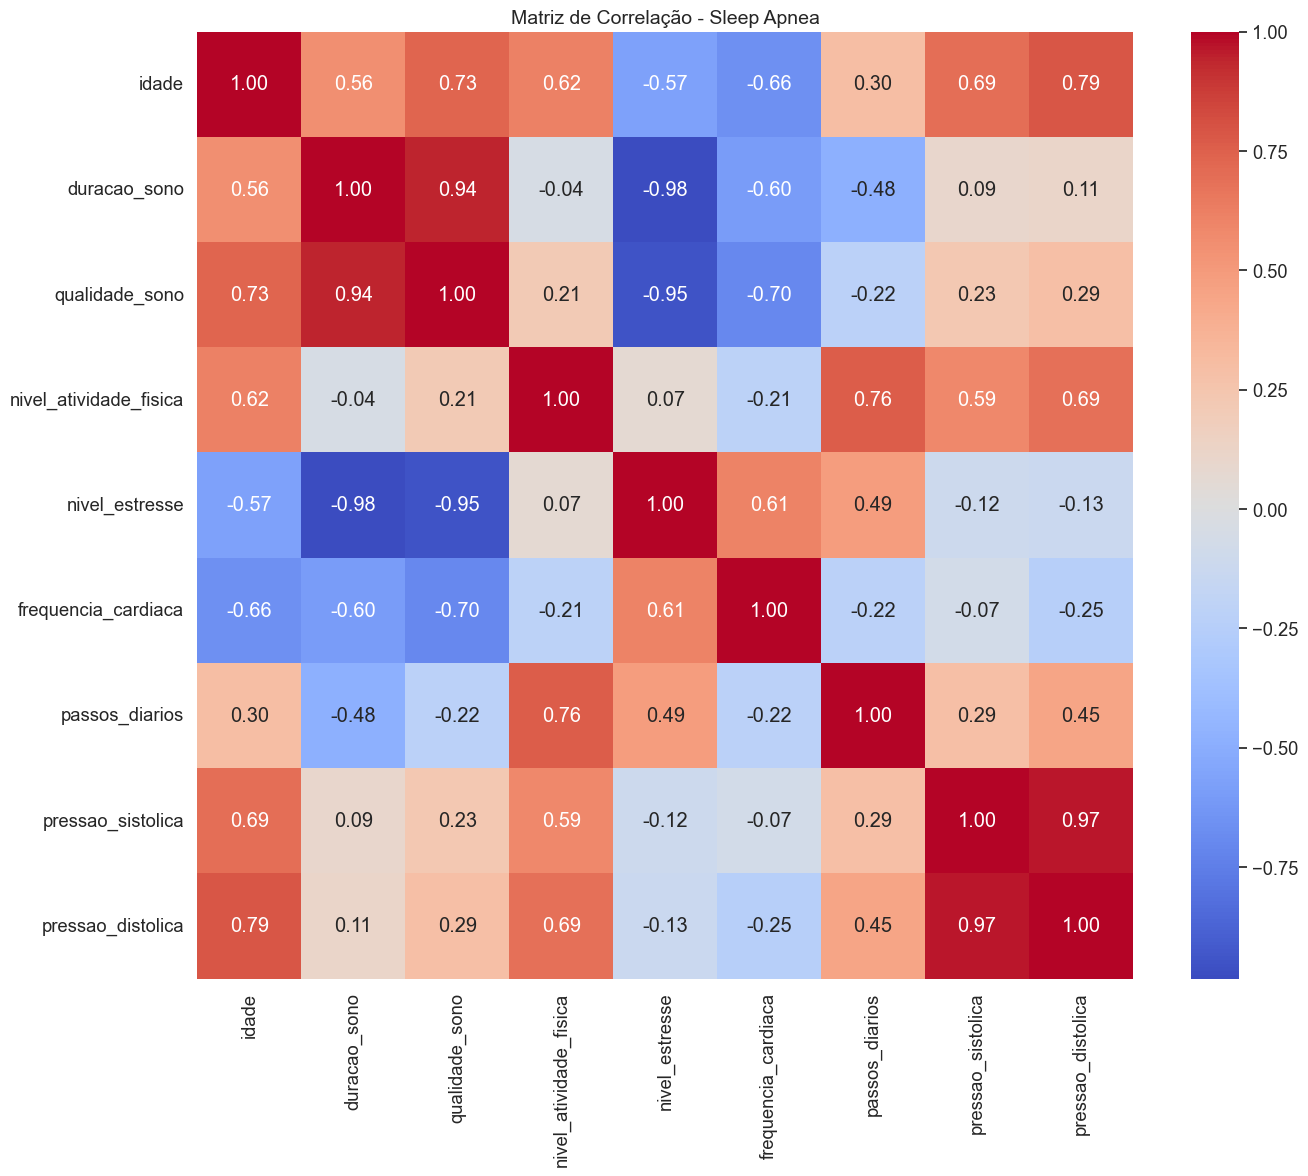

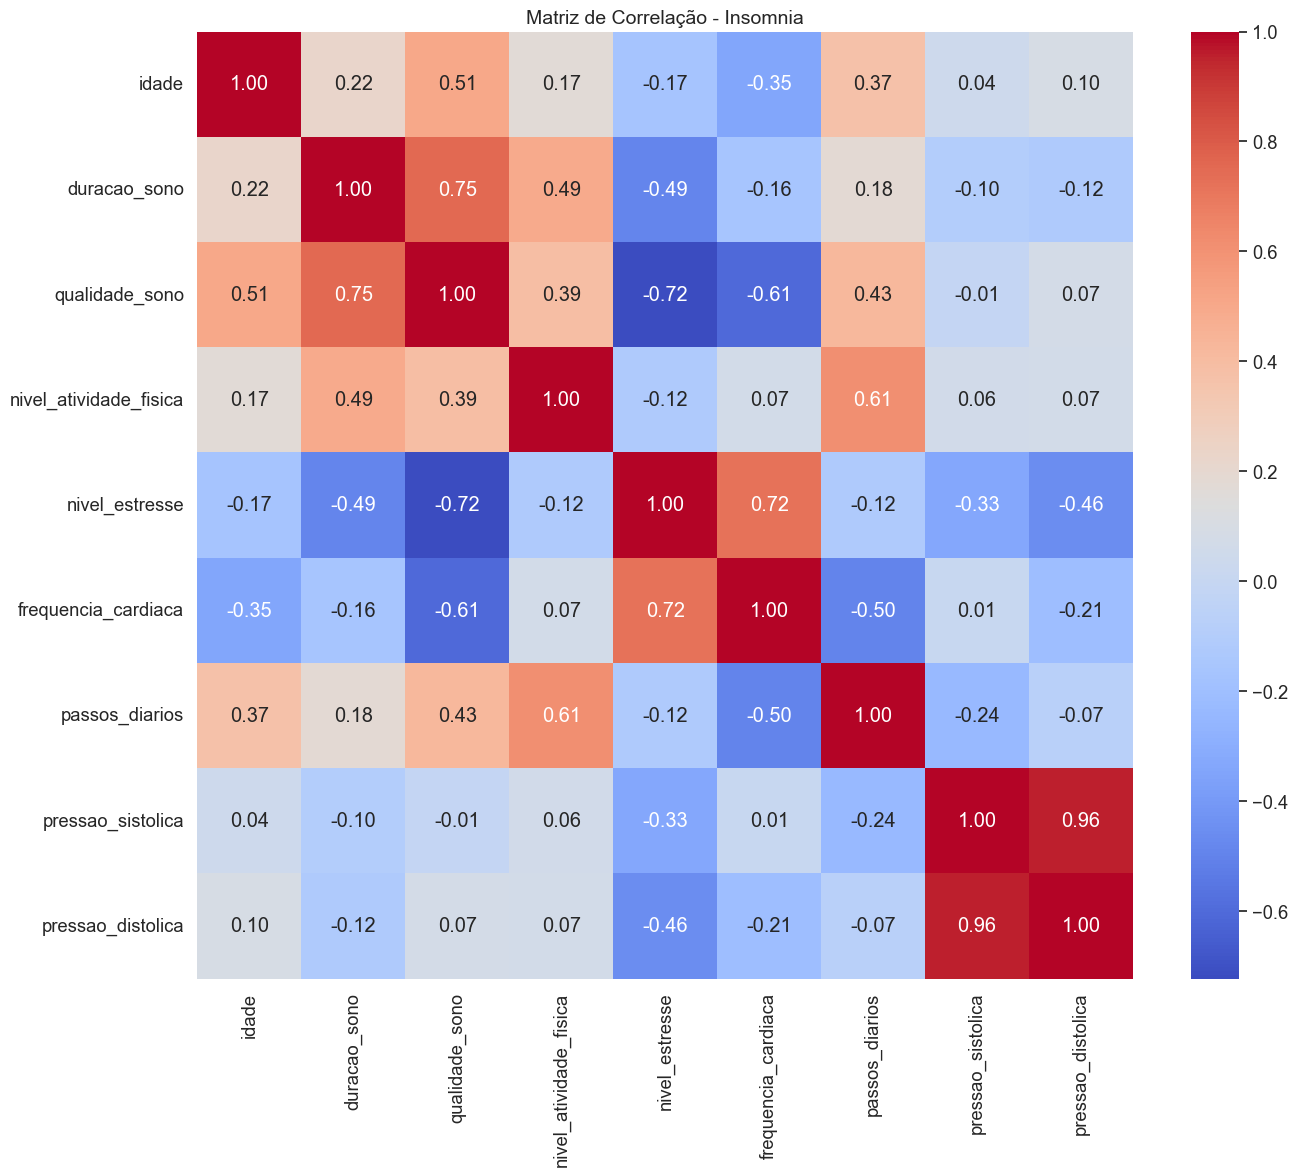

In [59]:
#MATRIZ DE CORRELAÇÃO PARA VARIÁVEIS NUMÉRICAS
for disturbio in df_tratados['disturbio_sono'].unique():
    if isinstance(disturbio, str):  # Verificar se é uma string válida
        subset = df_tratados[df_tratados['disturbio_sono'] == disturbio]
        correlation_matrix = subset[num_col].corr()
        plt.figure(figsize=(14, 12))
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
        plt.title(f'Matriz de Correlação - {disturbio}', fontsize=14)
        plt.tight_layout()